# House Prices Data Set

As mentioned the Kaggle House Prices dataset is a popular dataset used for regression tasks in machine learning. It contains information about residential houses in Ames, Iowa and has 81 explanatory variables describing various aspects of a house, such as price, lot size, overall condition, number of bedrooms, and neighborhood, among others. The goal is to predict the final sale price of each house using these features.
## WGET

To retrieve the dataset lets use **wget** which is a It is a popular tool for downloading files and does not require any additional libraries to be loaded or installed. Recall we use this file in our data wrangling course so lets get the raw file from the github repository.

In [ ]:
!wget https://raw.githubusercontent.com/odsc2015/Data-Wrangling-With-SQL/main/kaggle-house-price-data-set.csv

Notice how it was save to a file named ‘kaggle-house-price-data-set.csv'. If you are useing colab or other notebook IDEs you'll see it in your defaul drive. 

## Data Profiling

Now lets explore our dataset using one of the most popular open source tools available. Pandas is a powerful, open-source data manipulation library for Python that enables users to work with structured data. It provides data structures like DataFrame and Series, and extensive functionality for data cleaning, transformation, analysis, and visualization.

In [ ]:
# Pandas Library
import pandas as pd

# Load the dataset
house_df = pd.read_csv('kaggle-house-price-data-set.csv')

# Check the shape (rows, columns)
print("\n\n Data set rows and columns", house_df.shape)

# Print the first 5 rows
print("\n\n First set of row")
print(house_df.head())

# Now, let's examine the columns and their data types:
# By printing the column names and data types

print(house_df.dtypes)

## Descriptive statistics

We can use the describe() function to obtain summary statistics for the numerical features in the dataset. We use the describe() function to computes various summary statistics such as count, mean, standard deviation, minimum, first quartile, median (second quartile), third quartile, and maximum for given column. These statistics provide an overview of the distribution of data in each column of the dataset. 



In [ ]:
# Get summary statistics
summary = house_df.describe()
print(summary)

## Handling missing values

Before handling missing values, let's check the number of missing values in each column:



In [4]:
# Check for missing values
missing_values = house_df.isnull().sum()
print(missing_values)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


Now, let's decide how to handle missing values. For simplicity, we will fill missing values with the mean for numerical columns and the mode for categorical columns. After completing these steps, the dataset is ready for further analysis, visualization, and machine learning.


In [5]:
# Fill missing values
for column in house_df.columns:
    if house_df[column].dtype == 'object':
        # Categorical columns
        house_df[column].fillna(house_df[column].mode()[0], inplace=True)
    else:
        # Numerical columns
        house_df[column].fillna(house_df[column].mean(), inplace=True)

# Verify that there are no more missing values
print(house_df.isnull().sum())

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


# Column Access

We can the followng code to calculate a summary of the 'SalePrice' column in the dataset. The square brackets ['SalePrice'] are used to select a specific column from the DataFrame house_df. They act as an indexing operator that allows you to access a particular column by its name.  

In [6]:
# Get summary statistics
summary = house_df['SalePrice'].describe()
print(summary)


# Check for missing values
missing_values = house_df['SalePrice'].isnull().sum()
print("\n Missing sales price ", missing_values)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

 Missing sales price  0


## Plot the Distribution

To plot the distribution least import the Seaborn library. Seaborn is a powerful and versatile Python data visualization library built on top of Matplotlib. We use the histplot() function from Seaborn to create a distribution plot of the 'SalePrice' column. The plot displays the distribution (histogram) of house sale prices, giving us an idea of the shape, central tendency, and spread of the data. The 

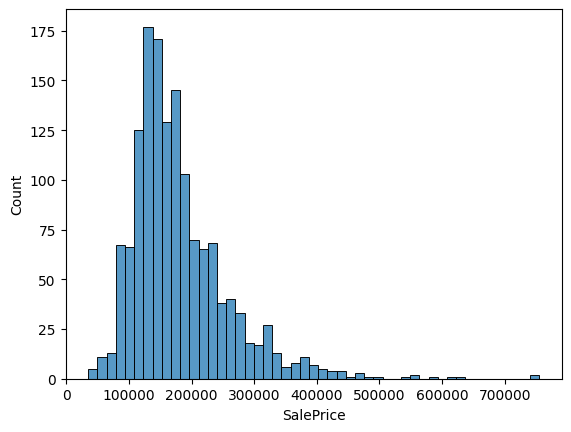

In [7]:
import seaborn as sns

sns.histplot(house_df['SalePrice']);


The histogram visually represents the distribution of the 'SalePrice' data by dividing the range of sale prices into a series of intervals (bins) and displaying the number of data points (house sales) that fall into each bin as bars. The height of each bar represents the frequency (count) of data points within that specific bin. The bins are typically organized along the x-axis, and the frequency (count) is represented on the y-axis. As you can see the histogram allows you to see the underlying frequency distribution, identify the central tendency, and observe the spread of the data.

## Correlations

Lets do some feature selection using a correlation matrix and heat map.
In the following code we import Matplotlib's pyplot as plt. Then, we create a heatmap using sns.heatmap() with the calculated correlation matrix as input. The annot parameter is set to False to avoid cluttering the plot with numbers. The cmap parameter is set to 'coolwarm' for a visually appealing color map. Finally, we add a title and use plt.show() to display the heatmap.

<ipython-input-10-e59125a9f99e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = house_df.corr()
<ipython-input-10-e59125a9f99e>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = house_df.corr()


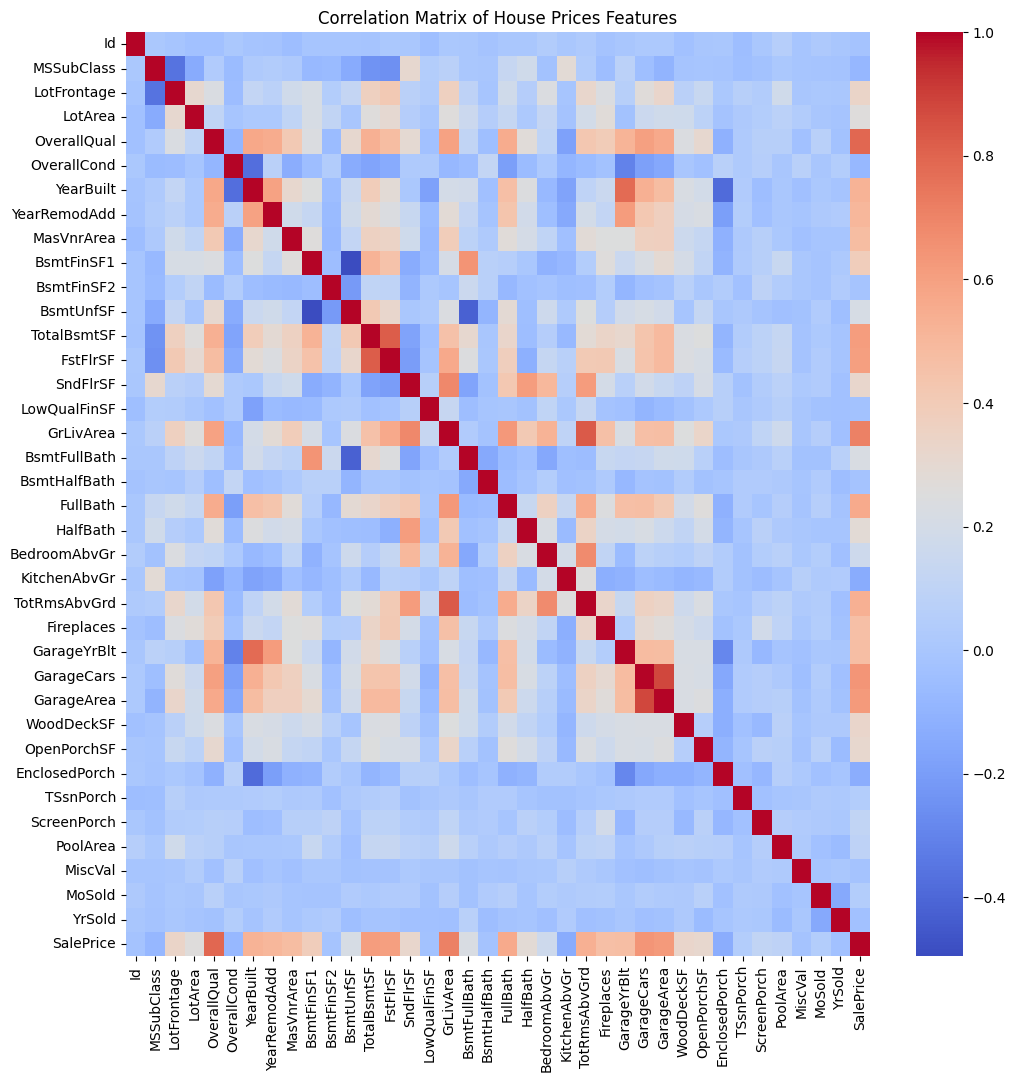

In [10]:
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = house_df.corr()

# Calculate the correlation matrix
corr_matrix = house_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

# Add title
plt.title('Correlation Matrix of House Prices Features')

# Display the heatmap
plt.show()

## Interpreting the results

The heatmap shows the correlation coefficients between each pair of numerical features in the dataset. The color represents the strength and direction of the correlation:

- Dark red: Strong negative correlation (values close to 1)
- Light red: Weak negative correlation (values close to 0)
- White: No correlation (values equal to 0)
- Light blue: Weak weat correlation (values close to 0)
- Dark blue: Strong negative correlation (values close to -1)

By inspecting the heatmap, you can identify which features are positively or negatively correlated with the target variable ('SalePrice') and which features are correlated with each other. This information can be useful in feature selection and engineering, as well as for building and interpreting machine learning models.

In summary, correlation analysis helps us understand the relationships between variables in the dataset, which is an important step in the data exploration process.

Lets make this simpler. To calculate correlations between the 'SalePrice' column and all other numerical columns in the DataFrame, you can use the corrwith() function in Pandas. Here's the code snippet to generate these correlations:



In [8]:
# Calculate the correlations between 'SalePrice' and all other columns
saleprice_corr = house_df.corrwith(house_df['SalePrice'])

# Sort the correlations by their values in descending order
sorted_corr = saleprice_corr.sort_values()


# Print the correlations
print(saleprice_corr)

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.334901
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
FstFlrSF         0.605852
SndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.470177
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
TSsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
dtype: float

<ipython-input-8-f4b0705765f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  saleprice_corr = house_df.corrwith(house_df['SalePrice'])


## Scatter Plots

To generate a scatterplot for the two variables 'SalePrice' and 'GrLivArea', you can use Matplotlib's scatter() function.  

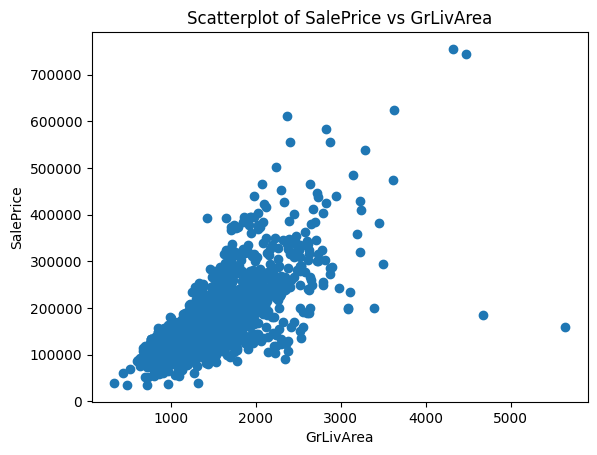

In [11]:
# Create a scatterplot for 'SalePrice' and 'GrLivArea'
plt.scatter(house_df['GrLivArea'], house_df['SalePrice'])

# Add title and labels
plt.title('Scatterplot of SalePrice vs GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

# Display the plot
plt.show()

## Feature Selection

Lets user what we learn prevous to apply a slight more rigerous approach to feature selection. A simple feature selection technique we can use is to select the features with the highest correlation with our target variable, 'SalePrice' and set a threshold for the correlation.

The threshold is a user-defined value that serves as a cut-off point for determining which features to include in the model. When performing feature selection based on correlation, the threshold is used to select features that have a strong linear relationship with the target variable.

Lets set the threshold to 0.5. This means that we will include only those features whose correlation with the target variable ('SalePrice') has an absolute value greater than 0.5. In other words, we are selecting features that have a correlation of more than 0.5 (positively correlated) or less than -0.5 (negatively correlated) with 'SalePrice'.
By setting a threshold, we aim to exclude features that have weak or no linear relationships with the target variable.

We already calculated the correlation values earlier ( **saleprice_corr** ). Based on these values, you can choose a threshold and select the features with correlation values above that threshold.

Note that we need to remove 'SalePrice' from our data since thisis our target feature.

In [12]:

# Set a threshold for correlation values
threshold = 0.5

# Select the features with correlation values above the threshold
selected_features = saleprice_corr[saleprice_corr.abs() > threshold].index.tolist()

# Remove 'SalePrice' from the selected features
selected_features.remove('SalePrice')

print(selected_features)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'FstFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']


## Your First Model

A simple model to for our house price dataset would be a linear regression model. Linear regression attempts to model the relationship between a dependent variable ('SalePrice' in this case) and one or more independent variables (features) by fitting a linear equation to the observed data.

Lets create a single-variable linear regression model using 'GrLivArea' as the independent variable and 'SalePrice' as the dependent variable.

To do so we are going to utilize a number of new libraries

- **sklearn.linear_model**: A module within the scikit-learn library that contains various linear models, including Linear Regression.  

- **sklearn.model_selection**: A module within the scikit-learn library that contains utilities for splitting datasets and evaluating models. 

- **sklearn.metrics**: A module within the scikit-learn library that contains various evaluation metrics for measuring the performance of machine learning models.  

### Breakdown

Here's a breakdown of the steps in the code example for the single-variable linear regression model:

1. Define feature and target variables: We create two variables, X and y. X is the feature matrix containing the 'GrLivArea' column, and y is the target vector containing the 'SalePrice' column.

2. Split the data into training and testing sets: We use the train_test_split function from the sklearn.model_selection module to split the dataset into training and testing sets. The training set will be used to train the model, while the testing set will be used to evaluate its performance.

3. Create the linear regression model: We instantiate the LinearRegression class from the sklearn.linear_model module to create a linear regression model.

4. Fit the model to the training data: We use the fit method of the LinearRegression class to train the model on the training data. The model learns the relationship between the 'GrLivArea' and 'SalePrice' from this data.

5. Make predictions on the testing data: We use the predict method of the LinearRegression class to make predictions on the testing data. This step produces an array of predicted 'SalePrice' values for each data point in the testing set.

6. Calculate evaluation metrics: We use the mean_squared_error and r2_score functions from the sklearn.metrics module to calculate the Mean Squared Error (MSE) and R-squared score, respectively. These metrics provide a quantitative measure of the model's performance.

7. Print the results: Finally, we print the calculated evaluation metrics (MSE and R-squared score) to assess the accuracy and goodness-of-fit of the linear regression model.



In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the independent variable (feature) and dependent variable (target)
area_x = house_df[['GrLivArea']]
target_y = house_df['SalePrice']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(area_x, target_y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean squared error: {:.2f}".format(mse))
print("Root Mean squared error: {:.2f}".format(rmse))
print("R-squared score: {:.2f}".format(r2))

Mean squared error: 3418946311.18
Root Mean squared error: 58471.76
R-squared score: 0.55


## Cost Function

A cost function, also known as a loss function is used to measure the difference between the predicted output and the actual target values in a model. The goal of training a model is to minimize the cost function, which leads to better predictions and improved performance. In the context of our linear regression model between GrLivArea and SalePrice (with SalePrice as the target feature), the cost function is typically the Mean Squared Error (MSE). The MSE calculates the average of the squared differences between the predicted house prices and the actual house prices, providing a measure of how well the linear regression model fits the data. By minimizing the MSE, the model learns the best-fitting line that describes the relationship between GrLivArea and SalePrice, ultimately leading to more accurate house price predictions.  This is a very simple example ad you'll learn about gradient descent and other optimization algorithms as you progress. 

## predict

To predict the price of an unseen house using the single-variable linear regression model we built earlier, you'll need to provide the above-ground living area ('GrLivArea') of the house. The model will use this feature to estimate the sale price of the house.

Here's how you can make a prediction for a new house:

Prepare the input data: Create a DataFrame or a 2D array-like structure containing the 'GrLivArea' value for the new house. Make sure that the input data has the same structure and order as the data used to train the mode

In [ ]:
import pandas as pd

# Assume the new house has an above-ground living area of 2000 square feet
new_house_grlivarea = 2000

# Create a DataFrame containing the 'GrLivArea' value
new_house_data = pd.DataFrame({'GrLivArea': [new_house_grlivarea]})

## Make a prediction 

Make a prediction using the model: Use the predict method of the LinearRegression class to make a prediction for the new house. This method takes the input data and returns an array of predicted sale prices.

In [ ]:
# Make a prediction for the new house
predicted_saleprice = model.predict(new_house_data)

# Print the predicted sale price
print(f"The predicted sale price for a house with {new_house_grlivarea} square feet of above-ground living area is: ${predicted_saleprice[0]:,.2f}")

## Results

In this example, we first create a DataFrame containing the 'GrLivArea' value for the new house (2000 square feet in this case). Then, we use the predict method of the LinearRegression class to estimate the sale price of the house. Finally, we print the predicted sale price.

Keep in mind that this single-variable linear regression model is relatively simple and may not provide highly accurate predictions for real-world house prices. For more accurate predictions, consider using multiple features and more advanced models, such as multivariate linear regression, decision trees, or neural networks.
